===========iteration:0===========
SGD:2.3190028837291266
Momentum:2.295172549551613
AdaGrad:2.1846055957157153
Adam:2.1106307666090203
===========iteration:100===========
SGD:1.5501393530013319
Momentum:0.23651456771536533
AdaGrad:0.08601498739232874
Adam:0.21164544854518522
===========iteration:200===========
SGD:0.7799836354845058
Momentum:0.18774226443595007
AdaGrad:0.05683416693371411
Adam:0.10347622920436798
===========iteration:300===========
SGD:0.5331276131485718
Momentum:0.1593792098377662
AdaGrad:0.08349686435915009
Adam:0.13187591601980955
===========iteration:400===========
SGD:0.4403289578038902
Momentum:0.16028398571091715
AdaGrad:0.05704020005564201
Adam:0.1653007636531748
===========iteration:500===========
SGD:0.3705384437304488
Momentum:0.16157077879741616
AdaGrad:0.10187122320719436
Adam:0.12366572901492222
===========iteration:600===========
SGD:0.4351248796996471
Momentum:0.2185995900695695
AdaGrad:0.08523663300592044
Adam:0.1309118057567687
===========iteration:70

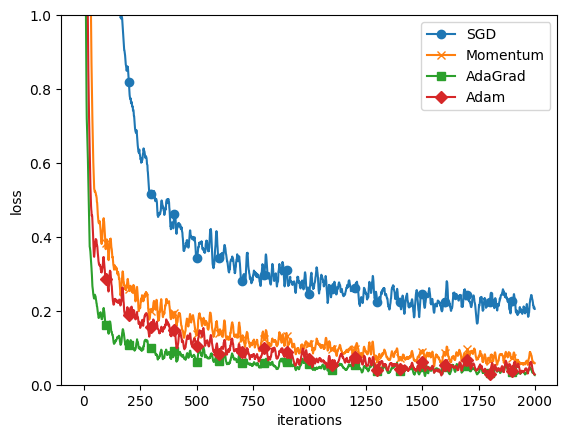

In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
